<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [38]:
folder = 'small-size_car'
file = 'Small-size_cars.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


download_images(path/file, dest, max_pics=200)

Error https://%E8%BB%BD%E8%87%AA%E5%8B%95%E8%BB%8A%E8%B2%B7%E5%8F%96%E6%9F%BB%E5%AE%9A.net/wp/wp-content/uploads/2017/12/1712211200.jpg encoding with 'idna' codec failed (UnicodeError: label empty or too long)


In [39]:
folder = 'standard-size_car'
file = 'Standard-size_car.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

Error http://%E8%BB%8A%E4%B8%AD%E6%B3%8A%E9%81%93%E3%81%AE%E9%A7%85.com/wp-content/uploads/2016/04/shuttle01.jpg HTTPConnectionPool(host='%e8%bb%8a%e4%b8%ad%e6%b3%8a%e9%81%93%e3%81%ae%e9%a7%85.com', port=80): Max retries exceeded with url: /wp-content/uploads/2016/04/shuttle01.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fccc9935c88>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [40]:
folder = 'medium-size_car'
file = 'Medium-size_car.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

Error https://%E9%81%8B%E8%BB%A2%E5%85%8D%E8%A8%B1.net/wp-content/uploads/2017/11/cyugata_track_03.jpg HTTPSConnectionPool(host='%e9%81%8b%e8%bb%a2%e5%85%8d%e8%a8%b1.net', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/cyugata_track_03.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fccc9a48cf8>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://%E9%81%8B%E8%BB%A2%E5%85%8D%E8%A8%B1.net/wp-content/uploads/2017/11/cyugata_track_08-800x600.jpg HTTPSConnectionPool(host='%e9%81%8b%e8%bb%a2%e5%85%8d%e8%a8%b1.net', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/cyugata_track_08-800x600.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fccc9a48cf8>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [41]:
folder = 'large‐size_car'
file = 'Large‐size_car.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['small-size_car', 'standard-size_car', 'medium-size_car', 'large‐size_car']

In [43]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

small-size_car


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/cars/small-size_car/00000041.png'>
standard-size_car


medium-size_car


cannot identify image file <_io.BufferedReader name='data/cars/medium-size_car/00000047.jpg'>
large‐size_car


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [51]:
data.classes

['large‐size_car', 'medium-size_car', 'small-size_car', 'standard-size_car']

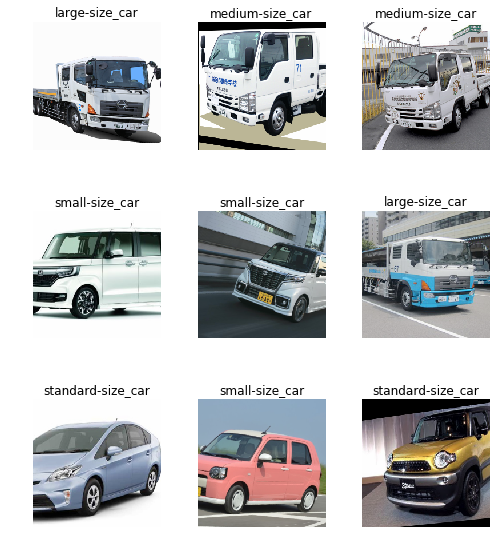

In [52]:
data.show_batch(rows=3, figsize=(7,8))

In [53]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['large‐size_car', 'medium-size_car', 'small-size_car', 'standard-size_car'],
 4,
 313,
 78)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [55]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.706776,1.040315,0.435897,00:16
1,1.326693,0.732192,0.346154,00:14
2,1.143602,0.738651,0.320513,00:15
3,1.009641,0.739261,0.282051,00:14


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [58]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


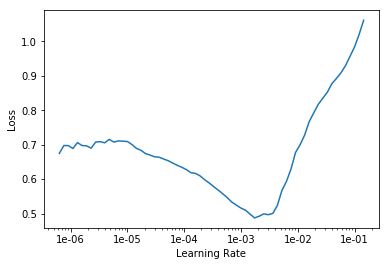

In [59]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.724558,0.725392,0.256410,00:14
1,0.650608,0.728089,0.256410,00:15


In [0]:
learn.save('stage-2')

In [62]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (313 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
large‐size_car,large‐size_car,large‐size_car,large‐size_car,large‐size_car
Path: data/cars;

Valid: LabelList (78 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
large‐size_car,large‐size_car,large‐size_car,medium-size_car,medium-size_car
Path: data/cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

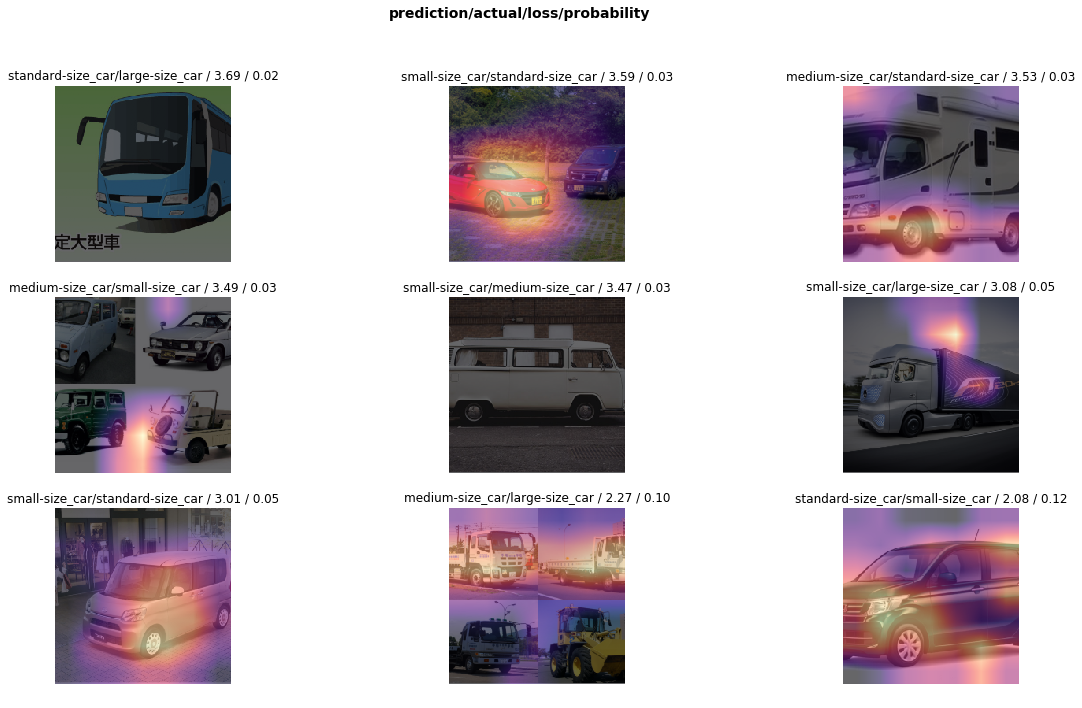

In [64]:
interp.plot_top_losses(9, figsize=(20,11), heatmap=True)

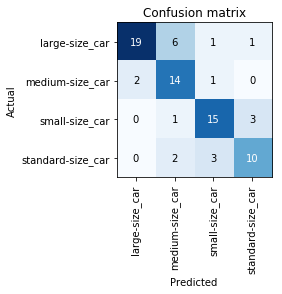

In [65]:
interp.plot_confusion_matrix()